In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    '../data/processed/job_offers.csv',
    sep=';',
    encoding='UTF-8')
df.head()

,name,company,technology,job,location.city,location.country,salary.low,salary.high,salary.currency,salary,salary.avg,is_senior
0,product data analyst,No Fluff Jobs,NaN,data analyst,zdalna,B/D,12000.0,18000.0,PLN,NaN,15000.0,0
1,data analyst (private equity),Devire,NaN,data analyst,warszawa,POL,12000.0,18000.0,PLN,NaN,15000.0,0
2,business analyst/senior business analyst,SoftServe,NaN,data analyst,zdalna,B/D,11000.0,21500.0,PLN,NaN,16250.0,0
3,power bi developer / data analyst,Objectivity,NaN,data analyst,zdalna,B/D,14000.0,20000.0,PLN,NaN,17000.0,0
4,junior data analyst,Coinfirm,NaN,data analyst,zdalna,B/D,3100.0,5000.0,PLN,NaN,4050.0,0


job
data analyst           27
data engineer          95
frontend developer    191
java developer        240
selenium              104
test automation        29
dtype: int64


<AxesSubplot:xlabel='job'>

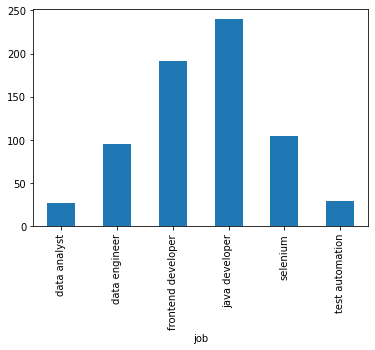

In [3]:
job_offers = df.groupby(by=['job']).size()

print(job_offers)
job_offers.plot.bar()

location.city  job               
zdalna         java developer        170
               frontend developer    139
               selenium               82
               data engineer          76
warszawa       java developer         26
zdalna         data analyst           20
               test automation        18
warszawa       selenium               11
wrocław        java developer         11
warszawa       frontend developer     10
wrocław        frontend developer     10
budapest       java developer          8
kraków         frontend developer      7
warszawa       data engineer           7
               data analyst            6
dtype: int64


<AxesSubplot:xlabel='location.city,job'>

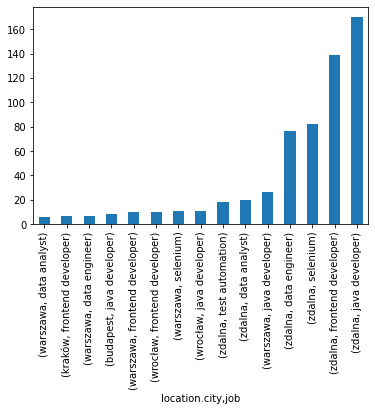

In [8]:
offers_by_city = df.groupby(by=['location.city', 'job']).size().nlargest(15)

print(offers_by_city)
offers_by_city.sort_values().plot.bar()

                      salary.avg  count
job                                    
test automation     14343.844828     29
data analyst        14754.351852     27
selenium            15303.225962    104
frontend developer  15658.086387    191
java developer      16921.081250    240
data engineer       20741.005263     95


array([[<AxesSubplot:title={'center':'salary.avg'}, xlabel='job'>,
        <AxesSubplot:title={'center':'count'}, xlabel='job'>]],
      dtype=object)

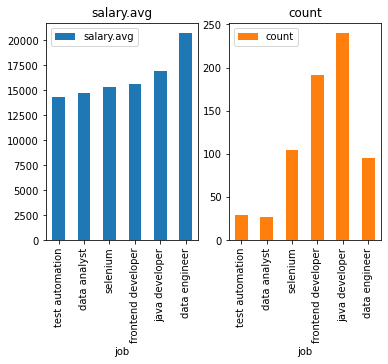

In [10]:
offer_salary = df.groupby(by=['job']).agg({'salary.avg': 'mean', 'name': 'count'})
offer_salary.sort_values(by=['salary.avg'], inplace=True)
offer_salary.rename(columns={'name':'count'}, inplace=True)

print(offer_salary)
offer_salary.plot(subplots=True, layout=(1, 2), kind='bar')

In [12]:
offer_salary_by_city = df.groupby(by=['location.city']).agg({'salary.avg': 'mean', 'name': 'count'})
offer_salary_by_city.sort_values(by=['salary.avg'], inplace=True)
offer_salary_by_city.rename(columns={'name':'count'}, inplace=True)

offer_salary_by_city

,salary.avg,count
location.city,,
szczecin,3750.000000,1
mysłowice,5500.000000,1
bydgoszcz,5500.000000,2
malbork,5500.000000,1
rzeszów,6000.000000,1
częstochowa,7000.000000,1
opole,8250.000000,1
szombathely,9584.250000,2
trzebinia,9750.000000,1


<AxesSubplot:xlabel='location.city'>

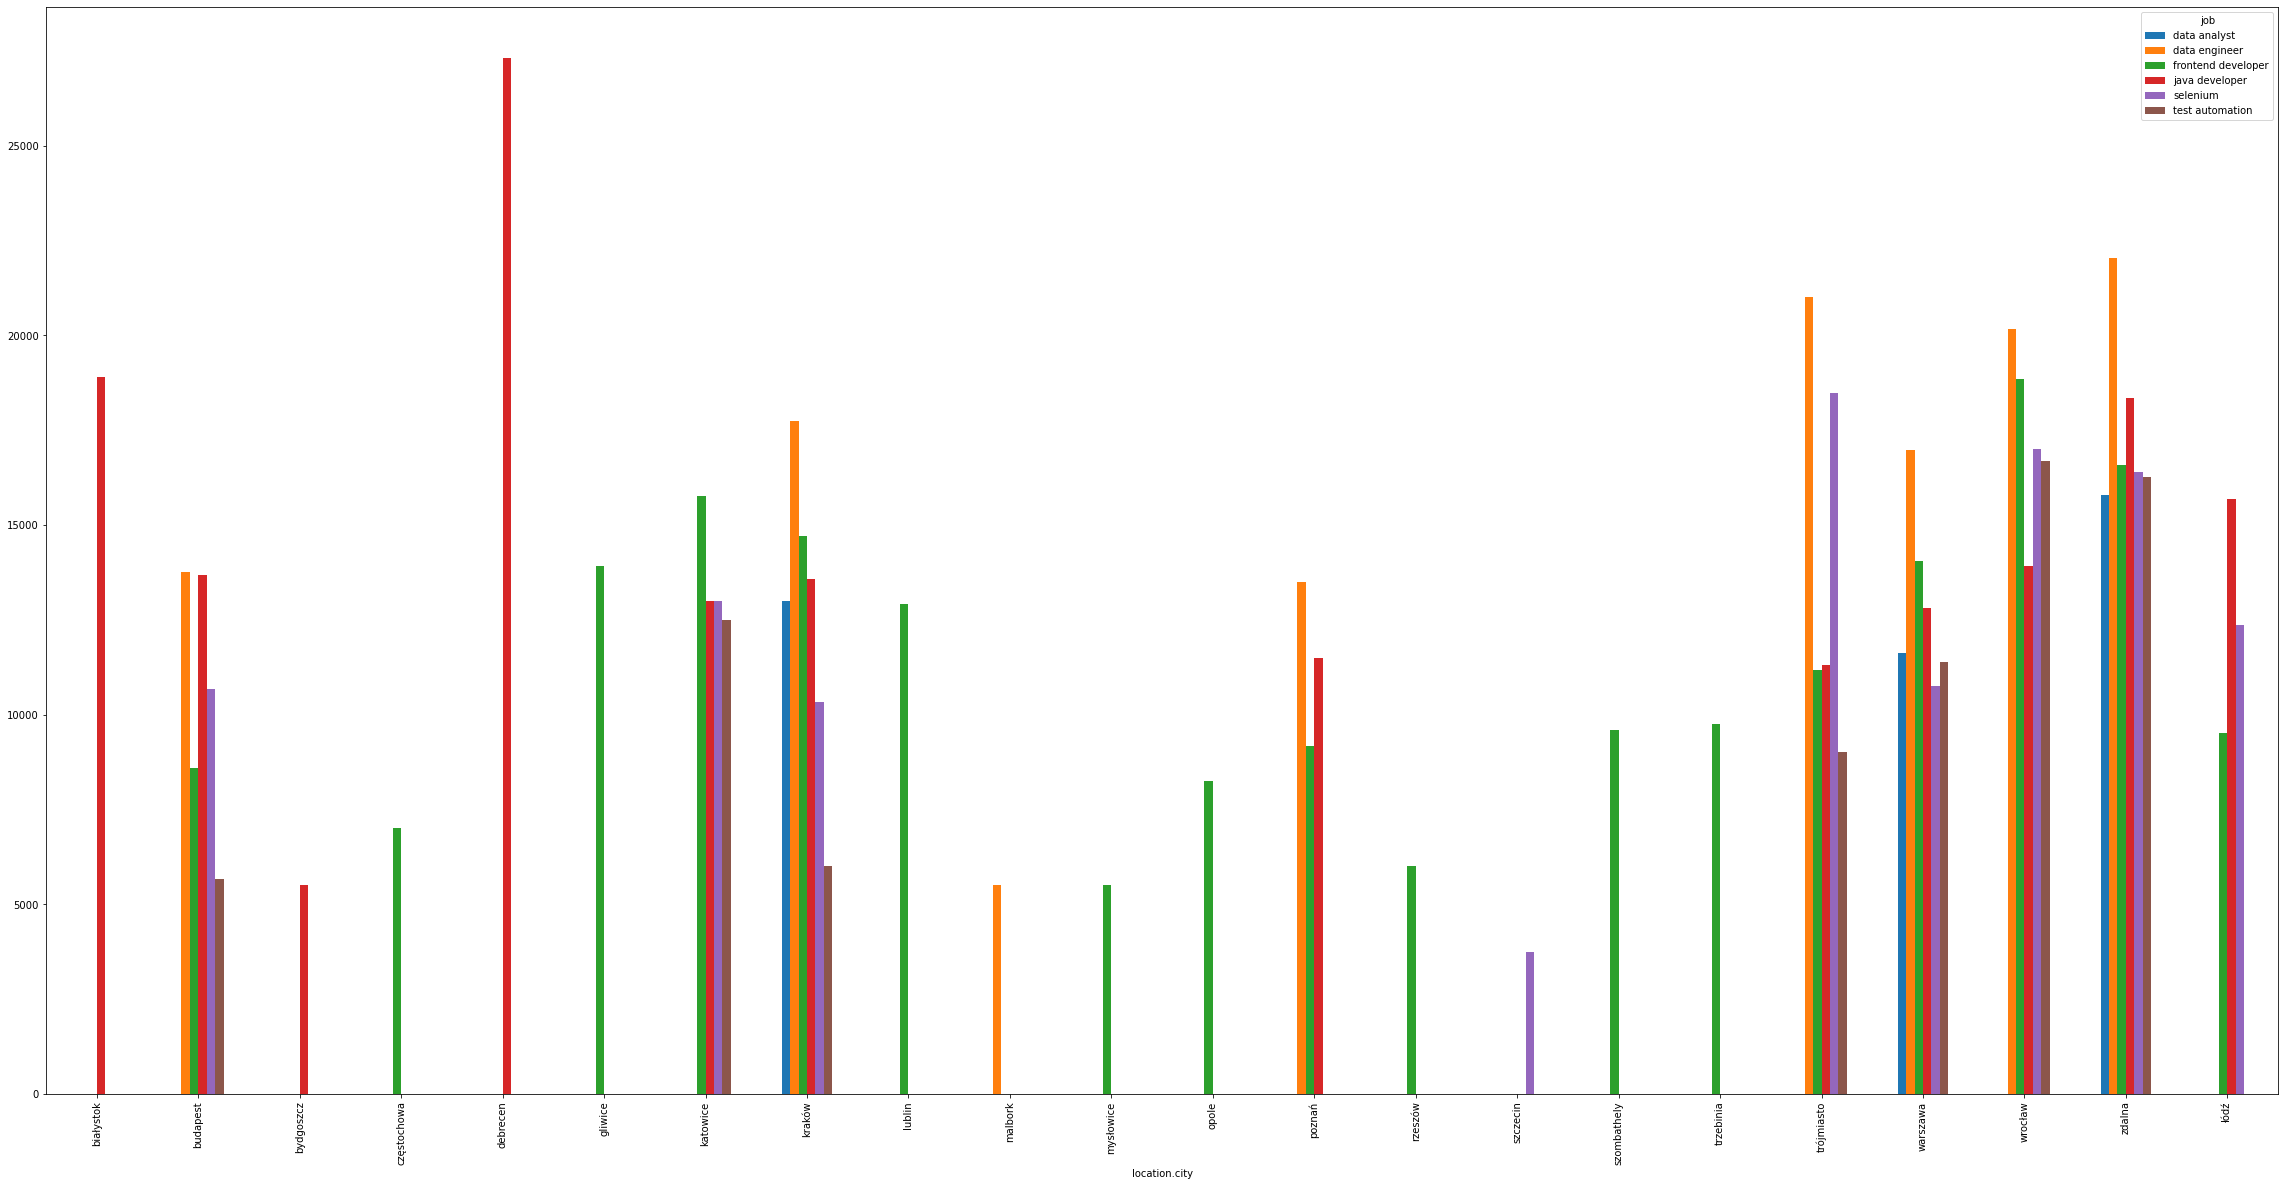

In [19]:
df.pivot_table(index='location.city', columns='job', values='salary.avg').plot(kind='bar', figsize=(40, 20))

In [14]:
salary_by_senior = df.groupby(by=['job', 'is_senior']).agg({'salary.avg': 'mean', 'name': 'count'})
salary_by_senior

salary.avg  name
job                is_senior                    
data analyst       0          14268.700000    25
                   1          20825.000000     2
data engineer      0          19912.444444    81
                   1          25534.821429    14
frontend developer 0          14730.438235   170
                   1          23167.619048    21
java developer     0          16421.792627   217
                   1          21631.760870    23
selenium           0          14845.258427    89
                   1          18020.500000    15
test automation    0          13872.538462    26
                   1          18428.500000     3